## Monty Hall Problem

Bored during lockdown so going to have a go at coding up the Monty Hall problem!

First read in some useful packages.

In [29]:
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib

# Also I'm going to select my color palette here
palette = sns.color_palette('colorblind')

We're going to define a function that runs one trial of the monty hall problem, then we can repeat this many times to build up the probability distribution.

In [30]:
# The change parameter here just represents whether or not you want to change your door choice on this particular
# Monty Hall run.
def monty_hall_run(change):
    doors = [1,2,3]
    # Set up the correct door and the initial door you choose
    correct_door = sp.random.choice(doors)
    chosen_door = sp.random.choice(doors)
    
    # Now we eliminate one door that is the incorrect door
    other_doors = []
    for door in doors:
        if (door != correct_door) & (door != chosen_door):
            other_doors.append(door)
    
    open_door = sp.random.choice(other_doors)
    doors.remove(open_door)
    
    door1 = doors[0]
    door2 = doors[1]
    if change == True:
        if chosen_door == door1:
            chosen_door = door2
        elif chosen_door == door2:
            chosen_door = door1
    
    # Here, I set the result to 100 if the correct door was chosen, and 0 if the incorrect door was chosen
    # I then return the result - this will make it easier to plot later and we'll see why
    result = None
    if chosen_door == correct_door:
        result = 100
    else:
        result = 0
    return result   

Now we can run it many times, store the result and plot what happens if you change your answer or don't change your answer after the first door is opened.

In [31]:
change_doors, nochange_doors = [], []
for i in sp.arange(0,1000):
    change_doors.append(monty_hall_run(True))
    nochange_doors.append(monty_hall_run(False))

/Users/joe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  


And here we can plot the results.

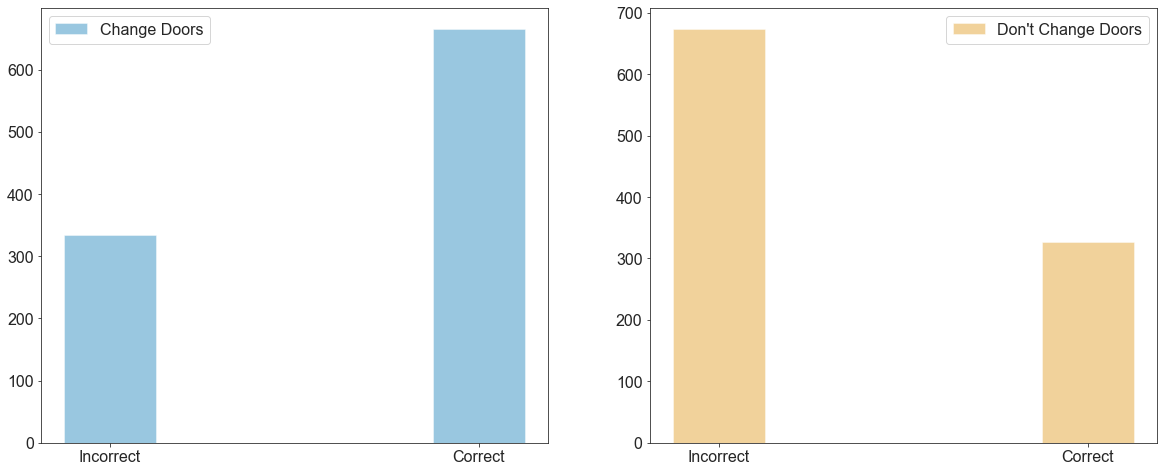

In [32]:
x_ticks = [10, 90]
x_labels = ['Incorrect', 'Correct']

matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize = (20, 8))
sns.set_style('ticks')

ax = fig.add_subplot(121)
sns.distplot(change_doors, kde=False, hist_kws = {'align': 'mid'}, color = palette[0], label = 'Change Doors')
plt.legend()
plt.xticks(x_ticks, x_labels)

ax2 = fig.add_subplot(122)
sns.distplot(nochange_doors, kde=False, hist_kws = {'align': 'mid'}, color = palette[1], label = "Don't Change Doors")
plt.legend()
plt.xticks(x_ticks, x_labels)

plt.show()

So for one 100 runs of the Monty Hall problem, apparently you'll select the right door ~2/3 of the time if you change and ~1/3 if you don't. But is this just a fluke? For a slightly more rigorous test, I will now repeat this, but instead taking a thousand iterations of 100 monty hall runs to see what the distribution of correct fractions if if you change and don't change the selected door.

In [33]:
change_prob, nochange_prob = [], []
for i in sp.arange(0,1000):
    change_doors, nochange_doors = [], []
    for j in sp.arange(0,1000):
        change_doors.append(monty_hall_run(True))
        nochange_doors.append(monty_hall_run(False))
        
    change_prob.append(len(sp.array(change_doors)[sp.array(change_doors) == 100]) / 1000.)
    nochange_prob.append(len(sp.array(nochange_doors)[sp.array(nochange_doors) == 100]) / 1000.)

/Users/joe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  
/Users/joe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  after removing the cwd from sys.path.
/Users/joe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  
/Users/joe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  if __name__ == '__main__':


And then plot the result!

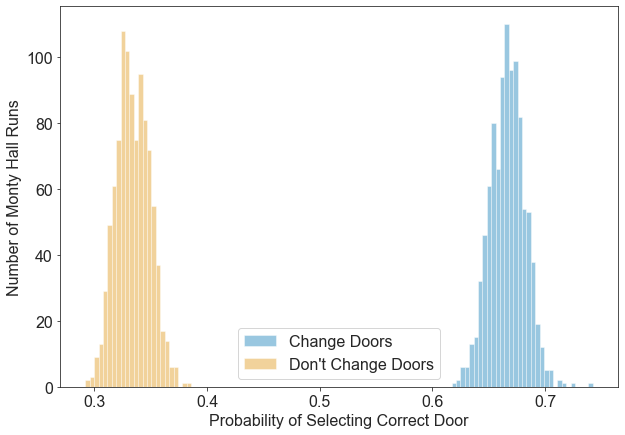

In [34]:
plt.figure(figsize = (10, 7))
sns.set_style('ticks')
matplotlib.rcParams.update({'font.size': 16})

sns.distplot(change_prob, kde=False, hist_kws = {'align': 'mid'}, color = palette[0], 
             label = 'Change Doors')
sns.distplot(nochange_prob, kde=False, hist_kws = {'align': 'mid'}, color = palette[1], 
             label = "Don't Change Doors")

plt.xlabel('Probability of Selecting Correct Door')
plt.ylabel('Number of Monty Hall Runs')
plt.legend()
plt.savefig('monty_hall_results.png')
plt.show()

Now we repeat this for four doors!

In [35]:
def monty_hall_4_run(change):
    doors = [1,2,3,4]
    # Set up the correct door and the initial door you choose
    correct_door = sp.random.choice(doors)
    chosen_door = sp.random.choice(doors)
    
    # Now we eliminate one door that is the incorrect door
    other_doors = []
    for door in doors:
        if (door != correct_door) & (door != chosen_door):
            other_doors.append(door)
    
    open_door = sp.random.choice(other_doors)
    doors.remove(open_door)
    
    door1 = doors[0]
    door2 = doors[1]
    door3 = doors[2]
    
    # First try randomly changing to one of the other two doors.
    if change == True:
        if chosen_door == door1:
            chosen_door = sp.random.choice([door2, door3])
        elif chosen_door == door2:
            chosen_door = sp.random.choice([door1, door3])
        elif chosen_door == door3:
            chosen_door = sp.random.choice([door1, door2])
    
    # Here, I set the result to 100 if the correct door was chosen, and 0 if the incorrect door was chosen
    # I then return the result
    result = None
    if chosen_door == correct_door:
        result = 100
    else:
        result = 0
    return result   

In [36]:
change_doors, nochange_doors = [], []
for i in sp.arange(0,1000):
    change_doors.append(monty_hall_4_run(True))
    nochange_doors.append(monty_hall_4_run(False))

/Users/joe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  


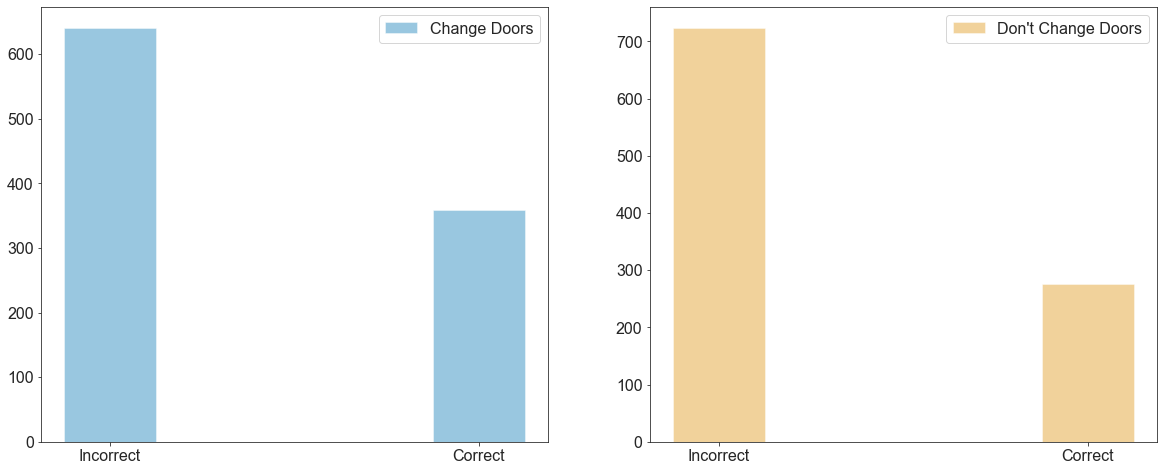

In [37]:
x_ticks = [10, 90]
x_labels = ['Incorrect', 'Correct']

matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize = (20, 8))
sns.set_style('ticks')

ax = fig.add_subplot(121)
sns.distplot(change_doors, kde=False, hist_kws = {'align': 'mid'}, color = palette[0], label = 'Change Doors')
plt.legend()
plt.xticks(x_ticks, x_labels)

ax2 = fig.add_subplot(122)
sns.distplot(nochange_doors, kde=False, hist_kws = {'align': 'mid'}, color = palette[1], label = "Don't Change Doors")
plt.legend()
plt.xticks(x_ticks, x_labels)

plt.show()

In [38]:
change_prob, nochange_prob = [], []
for i in sp.arange(0,1000):
    change_doors, nochange_doors = [], []
    for j in sp.arange(0,1000):
        change_doors.append(monty_hall_4_run(True))
        nochange_doors.append(monty_hall_4_run(False))
        
    change_prob.append(len(sp.array(change_doors)[sp.array(change_doors) == 100]) / 1000.)
    nochange_prob.append(len(sp.array(nochange_doors)[sp.array(nochange_doors) == 100]) / 1000.)

/Users/joe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  
/Users/joe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  after removing the cwd from sys.path.
/Users/joe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  
/Users/joe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  if __name__ == '__main__':


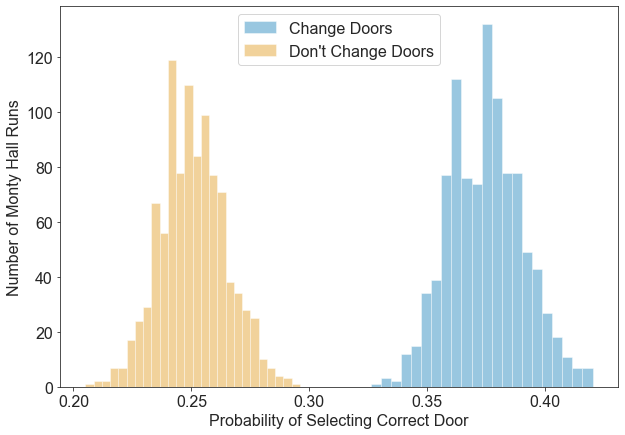

In [40]:
plt.figure(figsize = (10, 7))
sns.set_style('ticks')
matplotlib.rcParams.update({'font.size': 16})

sns.distplot(change_prob, kde=False, hist_kws = {'align': 'mid'}, color = palette[0], 
             label = 'Change Doors')
sns.distplot(nochange_prob, kde=False, hist_kws = {'align': 'mid'}, color = palette[1], 
             label = "Don't Change Doors")

plt.xlabel('Probability of Selecting Correct Door')
plt.ylabel('Number of Monty Hall Runs')
plt.legend()
plt.savefig('monty_hall_results_4doors.png')
plt.show()